# About the project

## The customer

The customer is a fashion retailer with numerous stores. The dataset consists only of the stationary trades in Germany, summarized over all stores.

## Task description

The fashion retailer want to use his data for:

  * sales volume predictions for articles 
  * optimal price determination of new articles on market launch
  * inventory calculation 
  * general predictions and strategic decision making
  
Such predictions needs a basic population, which serve as a basis for statistical calculations.
Predicting the sales of a specific article on basis of the whole assortment would be too imprecise.
The mean variation is too high, hence the quality of the prediction would be very low.
The multiplicity of articles allows to refer on a more representative population. For an optimal prediction quality, the population should be as big as possible and his mean variation as small as possible. It is possible to create such a population, by grouping articles with similar characteristic attributes to one unit. This can be realized through a clustering algorithm.

## Project goal

The overall goal of the project is to develop a clustering algorithm. This algorithm should be reasonable and statistically established. Further, the cluster building should be done on basis of revenue, article counts or sales quotas of the articles and every article has to be assigned to a cluster.

# Data Introduction

First, we want to give an overview of the provided data.
Therefore, we have a look at the raw dataset and 
do some visualization for a better understanding of the data

## Example of raw data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tailor
from tailor import data
from tailor import clustering
from tailor.visualization import *

In [3]:
raw_data = data.load_csv()
raw_data.head(10)

,article_id,transaction_date,markdown_start_date,markdown_end_date,original_price,sells_price,discount,markdown,article_count,season,brand,color,stock_total,avq,Abteilung,WHG,WUG,time_on_sale,revenue
0,900001,2014-03-27,2013-10-18,2014-05-31,59.95,53.95,6.00,0.0,2,Sommer,Fimmilena,mittelbraun,1499,0.133422,Abteilung005,WHG021,WUG073,0,107.90
1,900001,2014-03-28,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,2,Sommer,Fimmilena,mittelbraun,1499,0.266845,Abteilung005,WHG021,WUG073,1,119.90
2,900001,2014-03-29,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,3,Sommer,Fimmilena,mittelbraun,1499,0.466978,Abteilung005,WHG021,WUG073,2,179.85
3,900001,2014-03-31,2013-10-18,2014-05-31,59.95,59.55,0.40,0.0,5,Sommer,Fimmilena,mittelbraun,1499,0.800534,Abteilung005,WHG021,WUG073,4,297.75
4,900001,2014-04-01,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,6,Sommer,Fimmilena,mittelbraun,1499,1.200801,Abteilung005,WHG021,WUG073,5,359.70
5,900001,2014-04-02,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,4,Sommer,Fimmilena,mittelbraun,1499,1.467645,Abteilung005,WHG021,WUG073,6,239.80
6,900001,2014-04-03,2013-10-18,2014-05-31,59.95,58.59,1.36,0.0,4,Sommer,Fimmilena,mittelbraun,1499,1.734490,Abteilung005,WHG021,WUG073,7,234.36
7,900001,2014-04-04,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,7,Sommer,Fimmilena,mittelbraun,1499,2.201468,Abteilung005,WHG021,WUG073,8,419.65
8,900001,2014-04-05,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,13,Sommer,Fimmilena,mittelbraun,1499,3.068712,Abteilung005,WHG021,WUG073,9,779.35
9,900001,2014-04-06,2013-10-18,2014-05-31,59.95,59.95,0.00,0.0,2,Sommer,Fimmilena,mittelbraun,1499,3.202135,Abteilung005,WHG021,WUG073,10,119.90


## Feature overview

  * *markdown* is constant for *article_id* and *transaction_date* between *markdown_start_date* and *markdown_end_date*
  * *original_price* is constant for *article_id*
  * *sells_price* is the actual price paid by the customer
  * *sells_price*, *discount* and *markdown* are of the unit [Euro/article]
  * *article_count* denominates the number of sold articles
  * *discount* = *original_price* - *markdown* - *sells_price*
  * *avq* is the current stock divided by *stock_total*

In [4]:
pd.options.display.float_format = "{:.2f}".format
raw_data.describe(include=np.number)

,article_id,original_price,sells_price,discount,markdown,article_count,stock_total,avq,time_on_sale,revenue
count,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00,1131329.00
mean,904359.27,51.33,43.87,2.58,4.88,8.52,2162.84,30.12,87.38,317.27
std,2521.36,22.19,20.50,5.73,9.43,10.84,1960.91,22.89,50.69,385.77
min,900001.00,9.95,-47.96,-99.96,-19.00,1.00,106.00,0.00,0.00,-47.96
25%,902176.00,35.95,29.34,0.00,0.00,2.00,910.00,10.24,44.00,86.28
50%,904338.00,49.95,39.95,0.28,0.00,5.00,1737.00,26.28,86.00,190.95
75%,906569.00,64.95,58.02,2.50,10.00,11.00,2956.00,46.08,130.00,397.12
max,908708.00,179.95,199.91,129.96,90.00,281.00,36396.00,100.25,181.00,13403.60


## Consistency check

### Check if the dataset contains null values

In [5]:
raw_data.isna().values.any()

False

### Detect how many articles are contained in the dataset

In [6]:
len(raw_data['article_id'].unique())

8708

### Get the maximum *time_on_sale* value

In [7]:
raw_data['time_on_sale'].max()

181

### Check, how many articles have less then 182 *time_on_sale* values

In [8]:
tos_test = pd.DataFrame(raw_data.groupby('article_id').apply(lambda x: x.time_on_sale.nunique()))
tos_test.columns = ['number_tos']
len(tos_test.loc[tos_test.number_tos < 182])

8708

To sum up, there are 8708 different articles in the dataset. Non of the articles have 182 *time_on_sale* values. To build consistent series, we have to fill up the lacked values of each series

## Visualization of raw data

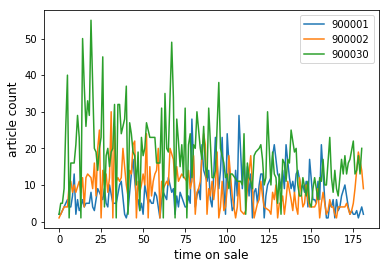

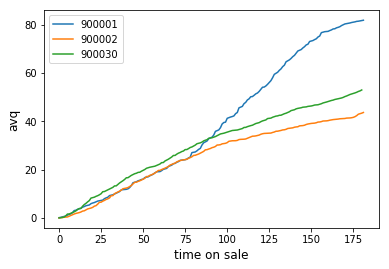

In [9]:
plot_articles(raw_data, [900001, 900002, 900030], 'article_count');
plot_articles(raw_data, [900001, 900002, 900030], 'avq');

# Data processing

For the next step, we process the raw data into a consistent and suitable dataset.
Therefore, we perform the following steps:

* __Drop Invalid Rows which do not make sense (e.g. negative sells price)__


* __Transform the different columns into specific datatypes:__
  * *article_id* = category
  * *transaction_date* = datetime
  * *markdown_start_date* = datetime
  * *markdown_end_date* = datetime
  * *all other columns* with datatype object = category
  
  
* __Build Features__
  * Build a new column and calculate the weeks an article has been on sale (weeks_on_sale)
  * Rebuild the season column with the season of the first transaction
  
  
* __Group By Weeks On Sale__
  * Replace the time_on_sale values through weeks on sale
  * As a result, we consider every article on a weekly basis instead of a daily basis
  
  
* __Fill Missing Values__
  * As we found out before, not all articles have sales on each day for the consecutive 182 days. Therefore, we add extra rows with zero values for the missing time_on_sales values

# Data Exploration

Next, we want to give an overview of the processed data and illustrate our proceed. Therefore, we now have a look at the processed dataset and do some visualization and explanations for a better and deeper understanding of the data.

## Example of processed data

In [17]:
processed_data = data.load_data()
processed_data

,article_id,brand,color,Abteilung,WHG,WUG,month,season,time_on_sale,original_price,sells_price,discount,markdown,article_count,stock_total,avq,revenue
0,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,0,51.39,50.47,0.91,0.00,3.14,1284.86,0.62,186.41
1,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,1,59.95,59.76,0.19,0.00,5.57,1499.00,3.10,333.23
2,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,2,51.39,50.53,0.86,0.00,4.57,1284.86,4.55,270.20
3,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,3,34.26,33.59,0.67,0.00,3.86,856.57,4.12,228.10
4,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,4,51.39,51.21,0.17,0.00,4.86,1284.86,8.01,289.47
5,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,5,42.82,42.49,0.33,0.00,3.86,1070.71,8.34,227.81
6,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,6,51.39,51.03,0.36,0.00,7.57,1284.86,12.39,451.34
7,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,7,51.39,50.10,1.29,0.00,4.71,1284.86,14.45,278.08
8,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,8,51.39,51.35,0.03,0.00,5.00,1284.86,16.42,299.56
9,900001,Fimmilena,mittelbraun,Abteilung005,WHG021,WUG073,January,Winter,9,42.82,41.68,-7.43,8.57,5.29,1070.71,15.55,312.59


In [11]:
processed_data.dtypes

article_id        category
brand             category
color             category
Abteilung         category
WHG               category
WUG               category
month             category
season            category
time_on_sale         int64
original_price     float64
sells_price        float64
discount           float64
markdown           float64
article_count      float64
stock_total        float64
avq                float64
revenue            float64
dtype: object

## Visualization of processed data

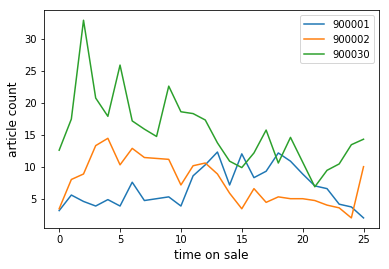

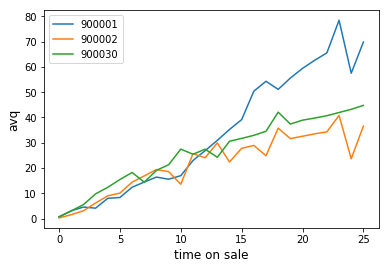

In [18]:
plot_articles(processed_data, [900001, 900002, 900030], 'article_count');
plot_articles(processed_data, [900001, 900002, 900030], 'avq');

In comparison to the visualization of the raw data, you can see that the graphs no longer looks that messy. Thereby, you can get a better idea of how similar graphs are.

## Inter-feature-variance

For the development of the clustering algorithm, we have to think about a criterion on which we divide the dataset into multiple pieces (cluster).
To remember, for an optimal prediction quality, we need a population as big as possible and with a mean variation as small as possible. We want to create such a population by grouping articles with similar characteristics.


Therefore, we want to split the feature with the highest variation between the individual characteristics and group the individual characteristics for a first segmentation. As from now, we will call the variation between the individual characteristics _inter-feat-variance_.


Thus, we next have a look at the graphs of the individual characteristics of a feature to get an idea, how different or similar they are.

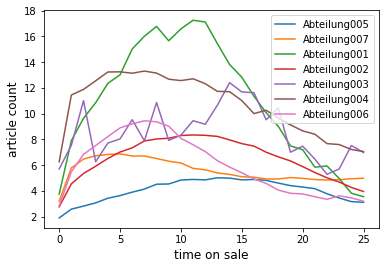

In [13]:
plot_feature_characteristics(processed_data, 'Abteilung', 'article_count');

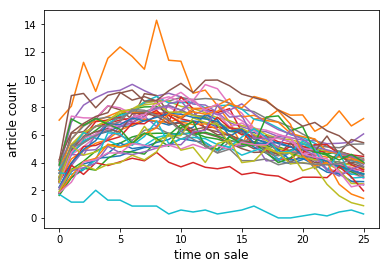

In [14]:
plot_feature_characteristics(processed_data, 'color', 'article_count', legend=False);

The first graph visualize the _inter-feat-variance_ of the feature _Abteilung_, the second one the _inter-feat-variance_ of the feature _color_.
These plots give a valuable representation on how the _inter-feat-variance_ of the different features could looks like.
In this example, the feature _Abteilung_ is more likely to have a high variance between the individual characteristics then the feature _color_.